In [1]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [104]:
X, y = make_blobs(1000, 2)

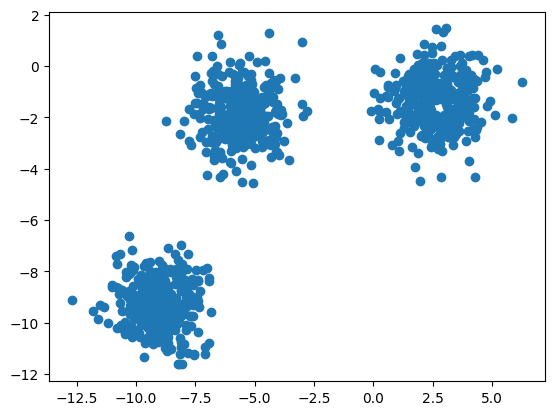

In [105]:
plt.scatter(X[:, 0], X[:, 1])

In [159]:
from tqdm.notebook import tqdm_notebook as tqdm

DISTANCE_METRICS = {
    "L2": lambda x, y: np.sqrt(np.sum((x-y)**2, axis=1)),
    "L1": lambda x, y: np.sum(np.abs(x - y), axis=1)
}
class KMeans:
    def __init__(self, k, metric="L2"):
        self.k = k
        self.distance_metric = DISTANCE_METRICS.get(metric)
        if self.distance_metric is None:
            raise TypeError(f"Unknown type for metric: {metric}")

    def init_centers(self, X):
        # TODO: Implement a better way later on...
        self.centers = np.random.normal(loc=X.mean(), scale=X.std(), size=(self.k, X.shape[1]))

    def train(self, X, n_iter=1):
        self.init_centers(X)
        for i in tqdm(range(n_iter)):
            distances = self.compute_distances(X) # Compute distance of each data point for each center
            clusters = np.argmin(distances, axis=1)
            # print("Updating centers...")
            for c in range(self.k):
                new_centers = X[clusters == c].mean(axis=0)
                if not np.isnan(new_centers).any():
                    self.centers[c] = new_centers
                # else:
                    # print(f"Found nan in one of the centers...., c={c}")

    def compute_distances(self, X):
        # TODO: error handling for shape
        n_data, dim = X.shape
        distances = np.zeros((n_data, self.k))
        return np.sum((X[:, np.newaxis, :] - self.centers[np.newaxis, :, :])**2, axis=2)
        


In [202]:
vectorized_square = np.vectorize(lambda x: x**2)

In [203]:
vectorized_square(np.arange(10))

array([ 0,  1,  4,  9, 16, 25, 36, 49, 64, 81])

In [192]:
kmeans = KMeans(k=3, metric="L2")

In [196]:
distances = kmeans.compute_distances(X)

In [200]:
distances.argmin(axis=1)

array([1, 0, 1, 1, 0, 1, 0, 1, 2, 2, 2, 2, 1, 2, 0, 1, 1, 2, 1, 2, 2, 1,
       2, 0, 0, 0, 2, 2, 1, 1, 2, 2, 0, 1, 0, 2, 2, 0, 2, 0, 2, 0, 1, 2,
       2, 0, 2, 2, 1, 2, 1, 1, 2, 2, 2, 0, 1, 0, 1, 0, 0, 2, 0, 1, 0, 0,
       1, 1, 2, 0, 2, 1, 0, 0, 1, 0, 2, 1, 2, 2, 2, 2, 0, 0, 1, 1, 0, 1,
       2, 2, 2, 1, 0, 1, 0, 2, 2, 1, 1, 2, 0, 2, 2, 2, 0, 0, 1, 2, 2, 0,
       1, 1, 1, 0, 0, 2, 1, 1, 1, 0, 1, 0, 1, 2, 2, 1, 0, 1, 1, 1, 2, 1,
       2, 2, 1, 0, 2, 1, 2, 2, 2, 2, 0, 0, 1, 2, 1, 1, 2, 0, 1, 2, 2, 0,
       0, 0, 2, 1, 1, 2, 1, 1, 1, 0, 2, 1, 2, 1, 1, 1, 1, 0, 2, 1, 0, 1,
       1, 1, 2, 0, 1, 1, 1, 0, 0, 2, 2, 2, 0, 0, 1, 1, 1, 0, 2, 1, 2, 1,
       2, 2, 0, 2, 2, 2, 2, 0, 2, 2, 0, 1, 1, 1, 0, 1, 2, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 0, 2, 2, 0, 0, 0, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2,
       2, 1, 2, 2, 1, 2, 2, 2, 2, 0, 2, 0, 2, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 2, 0, 0, 0, 2, 2, 1, 0, 2, 1, 2, 2,
       2, 2, 0, 0, 0, 1, 2, 1, 1, 2, 2, 0, 2, 1, 1,

In [199]:
X[]

array([[-8.80481074, -9.66115317],
       [-7.26736489, -1.01361851],
       [-8.80481074, -9.66115317],
       ...,
       [-8.80481074, -9.66115317],
       [-7.26736489, -1.01361851],
       [-5.69221026, -1.01983257]], shape=(1000, 2))

  0%|          | 0/10 [00:00<?, ?it/s]

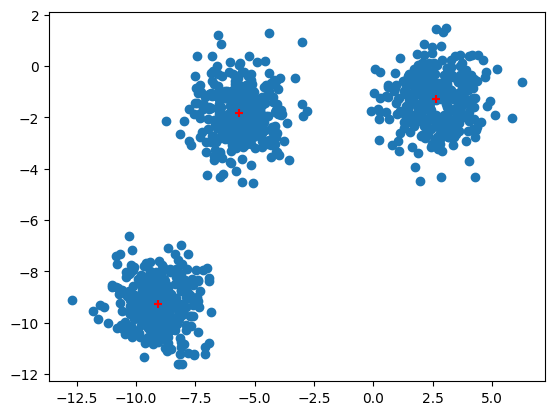

In [193]:
distances = kmeans.train(X, n_iter=10)
plt.scatter(X[:, 0], X[:, 1])
plt.scatter(kmeans.centers[:, 0], kmeans.centers[:, 1], c="r", marker="+")
plt.show()

In [103]:
kmeans.centers

array([[ 0.12133361, -0.25382389,  0.13984034, -0.40630522,  0.32265169],
       [ 0.10790919, -1.12367691,  1.75428716, -0.44183572, -1.20318181],
       [ 0.00537772, -0.0347727 , -0.40371824, -0.23825735,  0.57569329]])

In [67]:
distances

array([[4.28545743, 2.75024855, 2.25050029],
       [4.61357611, 2.34179832, 2.36904237],
       [4.02496173, 1.16654708, 2.35914156],
       [2.40097195, 1.87225814, 1.52212281],
       [4.63350954, 2.63744264, 3.95457612],
       [2.97081402, 2.8413437 , 1.76836529],
       [5.45524263, 3.22035535, 4.93980272],
       [4.52937251, 2.7207376 , 3.38474879],
       [2.81157911, 1.76655234, 1.89100774],
       [3.06505664, 3.16520732, 2.10475843]])

In [69]:
clusters =  distances.argmax(axis=1)

In [86]:
np.isnan(clusters).any()

np.False_

In [83]:
np.isnan(X[clusters == 2].mean(axis=0))

/var/folders/__/z7rngyn91018myhmk935cpf80000gp/T/ipykernel_31447/3391154692.py:1: RuntimeWarning: Mean of empty slice.
  np.isnan(X[clusters == 2].mean(axis=0))
/Users/kaushal.mishra/work/mle/.venv/lib/python3.12/site-packages/numpy/_core/_methods.py:137: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


array([ True,  True,  True,  True,  True])

In [76]:
X

array([[-0.8802772 , -0.41235118,  0.21480914,  0.68600229,  2.16549088],
       [ 0.77626873,  0.28523234, -0.26651167,  1.34787545,  0.0708878 ],
       [-0.55378236, -1.11783414,  0.38045325,  0.52158762,  0.12653487],
       [-0.23146904,  0.43013348, -1.1610772 , -0.71306624,  0.11144976],
       [-0.30026193, -2.30694353,  1.14222306, -1.17772636, -0.60242636],
       [ 0.10865571, -0.05425594, -1.03044958, -1.53141452,  1.30080351],
       [ 0.5160803 ,  0.0595897 ,  2.36635127,  0.29405492, -1.80393725],
       [ 1.1016379 ,  0.60206125,  1.18319487, -0.20337209, -0.05895147],
       [-0.15804641,  0.62288989, -1.22034763, -0.06087605, -0.50856566],
       [-0.11996558, -0.63405728, -1.32981711, -1.95279524,  1.39789665]])

In [79]:
X[clusters == 0].mean(axis=0)

array([ 0.04208952, -0.21016424,  0.17873839, -0.09299278,  0.08903179])

In [24]:
X, centers

(array([[-0.8802772 , -0.41235118,  0.21480914,  0.68600229,  2.16549088],
        [ 0.77626873,  0.28523234, -0.26651167,  1.34787545,  0.0708878 ],
        [-0.55378236, -1.11783414,  0.38045325,  0.52158762,  0.12653487],
        [-0.23146904,  0.43013348, -1.1610772 , -0.71306624,  0.11144976],
        [-0.30026193, -2.30694353,  1.14222306, -1.17772636, -0.60242636],
        [ 0.10865571, -0.05425594, -1.03044958, -1.53141452,  1.30080351],
        [ 0.5160803 ,  0.0595897 ,  2.36635127,  0.29405492, -1.80393725],
        [ 1.1016379 ,  0.60206125,  1.18319487, -0.20337209, -0.05895147],
        [-0.15804641,  0.62288989, -1.22034763, -0.06087605, -0.50856566],
        [-0.11996558, -0.63405728, -1.32981711, -1.95279524,  1.39789665]]),
 array([[ 1.0327681 , -0.8024753 , -0.16692645, -0.49519673,  1.12280163],
        [-0.07481612, -0.11928784, -0.43138512,  1.46339506,  1.41823038],
        [ 0.52171231, -0.32909281,  0.87800444,  0.34825138, -0.23618557]]))

In [28]:
def compute_distances(X, centers, k = 3):
    # TODO: error handling for shape
    n_data, dim = X.shape
    distances = np.zeros((n_data, k))
    for i in range(k):
        distances[:, 0] = ((X - centers[0,])**2).sum(axis=1)
    return distances

In [54]:
distances = np.zeros((X.shape[0], 3))
# for i in range()

In [55]:
distances[:, 0] = ((X - centers[0,])**2).sum(axis=1)

In [56]:
distances

array([[ 6.44009324,  0.        ,  0.        ],
       [ 5.76225481,  0.        ,  0.        ],
       [ 4.94261595,  0.        ,  0.        ],
       [ 5.17625537,  0.        ,  0.        ],
       [ 9.19652441,  0.        ,  0.        ],
       [ 3.26492012,  0.        ,  0.        ],
       [16.61633693,  0.        ,  0.        ],
       [ 5.28199553,  0.        ,  0.        ],
       [ 7.40939501,  0.        ,  0.        ],
       [ 4.90974493,  0.        ,  0.        ]])